In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.drop('Time',axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
no_of_transcations=len(df)
fraud_transcations=len(df[df['Class']==1])
nonfraud_transcations=len(df[df['Class']==0])

print("Total number of transcations are {}".format(no_of_transcations))
print("Total number of fraud transcations are {}".format(fraud_transcations))
print("Total number of non-fraud transcations are {}".format(nonfraud_transcations))
print("The percentage of fraud transcations is {}".format(fraud_transcations/no_of_transcations*100))

Total number of transcations are 284807
Total number of fraud transcations are 492
Total number of non-fraud transcations are 284315
The percentage of fraud transcations is 0.1727485630620034


In [5]:
fraud_transcations=df[df['Class']==1]
nonfraud_transcations=df[df['Class']==0]

print("Statistics of amount of fraud_transcations")
fraud_transcations.Amount.describe()

Statistics of amount of fraud_transcations


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
print("Statistics of amount of nonfraud_transcations")
nonfraud_transcations.Amount.describe()

Statistics of amount of nonfraud_transcations


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
#Normalizing amount
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Amount']=sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [10]:
#Splitting data into training set and testing set
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1).values
y=df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred=log_reg.predict(X_test)

In [17]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

In [18]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
decision_tree.fit(X_train, y_train)
decision_tree_pred= decision_tree.predict(X_test)

In [19]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth = 4)
random_forest.fit(X_train, y_train)
random_forest_pred= random_forest.predict(X_test)

In [20]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)

In [26]:
#Calculating accuracy for each model
from sklearn.metrics import accuracy_score

print("Accuracy score of LogisticRegression model is {}".format(accuracy_score(y_test,log_reg_pred)))
print("---------------")
print("Accuracy score of SVM model is {}".format(accuracy_score(y_test,svm_pred)))
print("---------------")
print("Accuracy score of DecisionTreeClassifier model is {}".format(accuracy_score(y_test,decision_tree_pred)))
print("---------------")
print("Accuracy score of RandomForestClassifier model is {}".format(accuracy_score(y_test,random_forest_pred)))
print("---------------")
print("Accuracy score of K-Nearest Neighbor model is {}".format(accuracy_score(y_test,knn_pred)))

Accuracy score of LogisticRegression model is 0.9991924440855307
---------------
Accuracy score of SVM model is 0.9993153330290369
---------------
Accuracy score of DecisionTreeClassifier model is 0.9993679997191109
---------------
Accuracy score of RandomForestClassifier model is 0.9993328885923949
---------------
Accuracy score of K-Nearest Neighbor model is 0.9995259997893332


In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion matrix of logistic regression model")
print(confusion_matrix(y_test, log_reg_pred, labels = [0, 1]))# Logistic Regression
print("----------")
print("Confusion matrix of SVM model")
print(confusion_matrix(y_test, svm_pred, labels = [0, 1])) # Support Vector Machine
print("----------")
print("Confusion matrix of DecisionTreeClassifier model")
print(confusion_matrix(y_test,decision_tree_pred, labels = [0, 1])) # Decision Tree
print("----------")
print("Confusion matrix of RandomForestClassifier model")
print(confusion_matrix(y_test, random_forest_pred, labels = [0, 1]))# Random Forest Tree
print("----------")
print("Confusion matrix of K-Nearest Neighbor model")
print(confusion_matrix(y_test, knn_pred, labels = [0, 1])) # K-Nearest Neighbors

Confusion matrix of logistic regression model
[[56852     9]
 [   37    64]]
----------
Confusion matrix of SVM model
[[56855     6]
 [   33    68]]
----------
Confusion matrix of DecisionTreeClassifier model
[[56849    12]
 [   24    77]]
----------
Confusion matrix of RandomForestClassifier model
[[56854     7]
 [   31    70]]
----------
Confusion matrix of K-Nearest Neighbor model
[[56854     7]
 [   20    81]]


In [12]:
confusion_matrix(y_train,knn.predict(X_train))

array([[227440,     14],
       [    79,    312]])

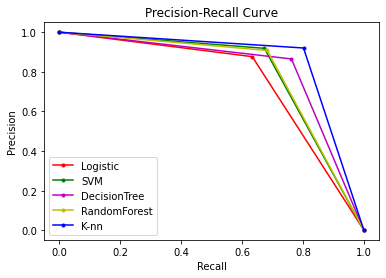

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


lr_precision,lr_recall,_=precision_recall_curve(y_test,log_reg_pred)
svm_precision,svm_recall,_=precision_recall_curve(y_test,svm_pred)
dt_precision,dt_recall,_=precision_recall_curve(y_test,decision_tree_pred)
rf_precision,rf_recall,_=precision_recall_curve(y_test,random_forest_pred)
knn_precision,knn_recall,_=precision_recall_curve(y_test,knn_pred)

plt.plot(lr_recall, lr_precision, marker='.', label='Logistic',color='r')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM',color='g')
plt.plot(dt_recall, dt_precision, marker='.', label='DecisionTree',color='m')
plt.plot(rf_recall, rf_precision, marker='.', label='RandomForest',color='y')
plt.plot(knn_recall, knn_precision, marker='.', label='K-nn',color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import auc

In [28]:
lr_auc=auc(lr_recall, lr_precision)
print("Area under Precision-Recall curve of Logistic Regression model is {}".format(lr_auc))
print("----------")
svm_auc=auc(svm_recall, svm_precision)
print("Area under Precision-Recall curve of SVM model is {}".format(svm_auc))
print("----------")
dt_auc=auc(dt_recall, dt_precision)
print("Area under Precision-Recall curve of DecisionTree model is {}".format(dt_auc))
print("----------")
rf_auc=auc(rf_recall, rf_precision)
print("Area under Precision-Recall curve of RandomForest model is {}".format(rf_auc))
print("----------")
knn_auc=auc(knn_recall, knn_precision)
print("Area under Precision-Recall curve of K-Nearest Neighbor model is {}".format(lr_auc))

Area under Precision-Recall curve of Logistic Regression model is 0.755512625474002
----------
Area under Precision-Recall curve of SVM model is 0.7963827896212037
----------
Area under Precision-Recall curve of DecisionTree model is 0.813983055235099
----------
Area under Precision-Recall curve of RandomForest model is 0.7958124158506227
----------
Area under Precision-Recall curve of K-Nearest Neighbor model is 0.755512625474002


In [8]:
fraud=len(df[df['Class']==1])

In [12]:
nonfraud_indices = df[df['Class'] == 0].index
fraud_indices = np.array(df[df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indices = np.random.choice(nonfraud_indices, fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)


## Undersampling techniques
from sklearn.model_selection import train_test_split
# concatenate both indices of fraud and non fraud
under_sampling_indices = np.concatenate([fraud_indices, random_normal_indices])

#extract all features from whole data for under sample indices only
under_sampling_data = df.iloc[under_sampling_indices, :]

# now we have to divide under sampling data to all features & target
x_undersampling_data = under_sampling_data.drop(['Class'], axis=1)
y_undersampling_data = under_sampling_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersampling_data, y_undersampling_data, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train_sample, y_train_sample.values.ravel())
log_reg_pred=log_reg.predict(X_test_sample)

In [15]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_sample, y_train_sample.values.ravel())
svm_pred=svm.predict(X_test_sample)

In [16]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
decision_tree.fit(X_train_sample, y_train_sample.values.ravel())
decision_tree_pred= decision_tree.predict(X_test_sample)

In [17]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth = 4)
random_forest.fit(X_train_sample, y_train_sample.values.ravel())
random_forest_pred= random_forest.predict(X_test_sample)

In [18]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sample,y_train_sample.values.ravel())
knn_pred= knn.predict(X_test_sample)

In [20]:
from sklearn.metrics import precision_recall_curve

lr_precision,lr_recall,_=precision_recall_curve(y_test_sample,log_reg_pred)
svm_precision,svm_recall,_=precision_recall_curve(y_test_sample,svm_pred)
dt_precision,dt_recall,_=precision_recall_curve(y_test_sample,decision_tree_pred)
rf_precision,rf_recall,_=precision_recall_curve(y_test_sample,random_forest_pred)
knn_precision,knn_recall,_=precision_recall_curve(y_test_sample,knn_pred)

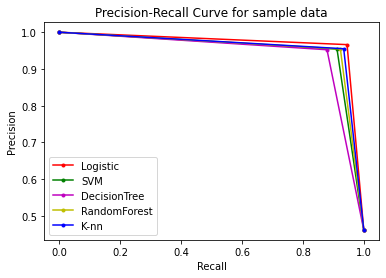

In [25]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plt.plot(lr_recall, lr_precision, marker='.', label='Logistic',color='r')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM',color='g')
plt.plot(dt_recall, dt_precision, marker='.', label='DecisionTree',color='m')
plt.plot(rf_recall, rf_precision, marker='.', label='RandomForest',color='y')
plt.plot(knn_recall, knn_precision, marker='.', label='K-nn',color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for sample data')
plt.legend()
plt.show()

In [23]:
lr_auc=auc(lr_recall, lr_precision)
print("Area under Precision-Recall curve of Logistic Regression model is {}".format(lr_auc))
print("----------")
svm_auc=auc(svm_recall, svm_precision)
print("Area under Precision-Recall curve of SVM model is {}".format(svm_auc))
print("----------")
dt_auc=auc(dt_recall, dt_precision)
print("Area under Precision-Recall curve of DecisionTree model is {}".format(dt_auc))
print("----------")
rf_auc=auc(rf_recall, rf_precision)
print("Area under Precision-Recall curve of RandomForest model is {}".format(rf_auc))
print("----------")
knn_auc=auc(knn_recall, knn_precision)
print("Area under Precision-Recall curve of K-Nearest Neighbor model is {}".format(lr_auc))

Area under Precision-Recall curve of Logistic Regression model is 0.9683638952731521
----------
Area under Precision-Recall curve of SVM model is 0.9533600188247484
----------
Area under Precision-Recall curve of DecisionTree model is 0.9436696974768041
----------
Area under Precision-Recall curve of RandomForest model is 0.9565776862731178
----------
Area under Precision-Recall curve of K-Nearest Neighbor model is 0.9683638952731521
